# Performing basic differential expression analysis with AlphaQuant

Below some code how to perform differential expression testing with AlphaQuant. This means we do a pairwise comparison of biological conditions and some volcano plot visualizations.

## Specifying input files

In [1]:
INPUT_FILE = "./data/subset_mouse_tissues/mouse_tissues_100prot_200ng.aq_reformat.tsv" 
SAMPLEMAP_FILE = "./data/subset_mouse_tissues/samplemap_200.tsv"

In order to run differential analyses you need two types of files:
* an input file from a proteomics search engine (e.g. DIA-NN, Spectronaut, AlphaPept etc.), or a pre-formatted file
* a sample mapping file that maps each sample to a condition (e.g. {'brain_rep1' : 'brain', 'brain_rep2': 'brain', 'heart_rep1' : 'heart', 'heart_rep2' : 'heart'}). In the GUI, there is some functionality to help with the comparison

For the results file, AlphaQuant is compatible to the default output tables of most common proteomics search engines. Detailed specifications on which tables you need can be found 
in our  [README](https://github.com/MannLabs/alphaquant/blob/main/README.md#section-title).

The sample mapping file has to look as follows:


In [2]:
#displaying the samplemap file
import pandas as pd
display(pd.read_csv(SAMPLEMAP_FILE, sep='\t'))


,sample,condition
0,20230926_OA2_CaWe_aQuant_mBrain_200ng_01.raw,brain
1,20230926_OA2_CaWe_aQuant_mBrain_200ng_02.raw,brain
2,20230926_OA2_CaWe_aQuant_mBrain_200ng_03.raw,brain
3,20230926_OA2_CaWe_aQuant_mBrain_200ng_04.raw,brain
4,20230926_OA2_CaWe_aQuant_mBrain_200ng_05.raw,brain
...,...,...
74,20230926_OA2_CaWe_aQuant_mTestis_200ng_06.raw,testis
75,20230926_OA2_CaWe_aQuant_mTestis_200ng_07.raw,testis
76,20230926_OA2_CaWe_aQuant_mTestis_200ng_08.raw,testis
77,20230926_OA2_CaWe_aQuant_mTestis_200ng_09.raw,testis


## Run AlphaQuant in pairwise-comparison mode

You can either specify explicitly which pairs of conditions you want to compare, or AlphaQuant will take all non-redundant pairs of all the conditions specified in your samplemap. In this example, we specify which pairs of conditions ('condpairs') we want to compare. Additionally, we can specify the results directory.

In [5]:
CONDPAIRS_TO_COMPARE = [('spleen', 'testis'), ('lungs', 'brain')]
RESULTS_DIRECTORY = "./data/subset_mouse_tissues/results_pairwise_analysis"

Now we can use the 'run_pipeline' command from AlphaQuant. This performs normalization between sample and then differential expression testing. The main output is a table of proteins with fold changes and an fdr value as a result of the differential expression test. Due to AlphaQuant's tree based approach, sensitivity is in general higher as compared to standard approaches like the t-test, i.e. there should be more proteins with low fdr, especially for lower fold changes.

start processeing condpair ('spleen', 'testis')
normalized within conditions
without missingvals (if applicable)


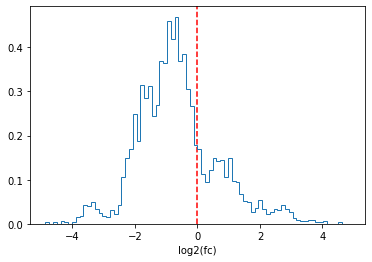

complete dataset


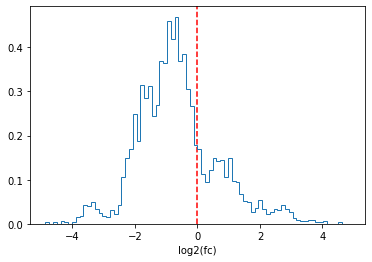

median -0.8106630368583518, mode -0.8282891052920638
using median for shift
shift comparison by 0.8106630368583518


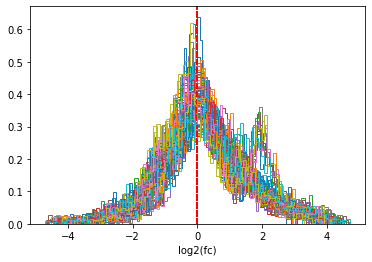

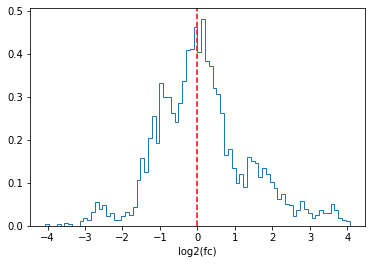

normalized between conditions
t_ion2nonan_sw 0.005548238754272461
t_intensity_selection 0.16335105895996094
t_ion2nonan_sw 0.005383014678955078
t_intensity_selection 0.15137624740600586
checked 0 of 2783 ions
checked 2000 of 2783 ions
checked 0 of 100 prots


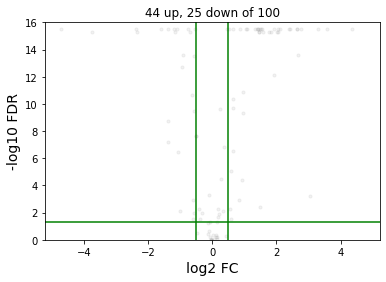

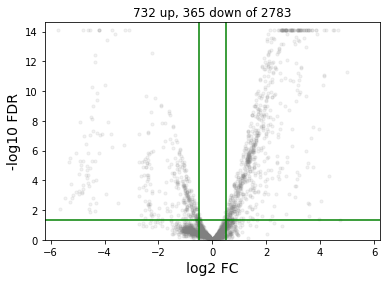


condition pair ('spleen', 'testis') finished!

start processeing condpair ('lungs', 'brain')
normalized within conditions
without missingvals (if applicable)


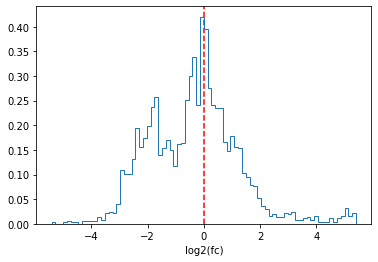

complete dataset


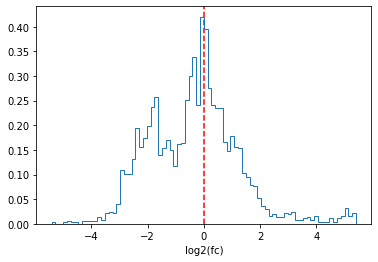

median -0.2582211316884333, mode -0.0907526108990453
using mode for shift
shift comparison by 0.0907526108990453


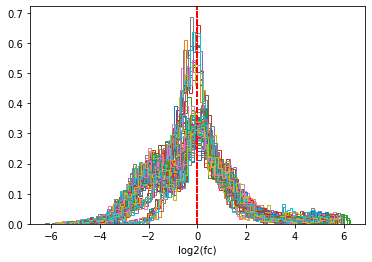

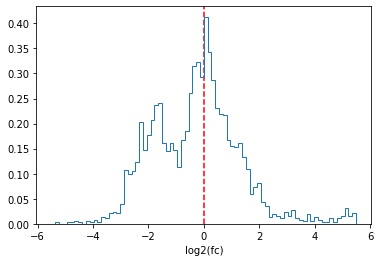

normalized between conditions
t_ion2nonan_sw 0.006968021392822266
t_intensity_selection 0.15737605094909668
t_ion2nonan_sw 0.005400180816650391
t_intensity_selection 0.14555597305297852
checked 0 of 2783 ions
checked 2000 of 2783 ions
checked 0 of 100 prots


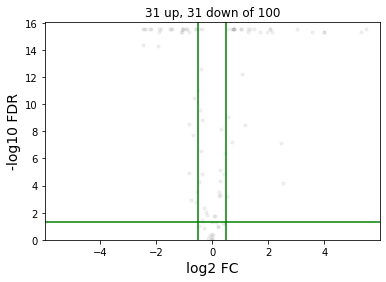

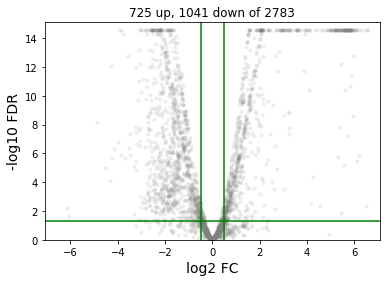


condition pair ('lungs', 'brain') finished!



In [6]:
import alphaquant.run_pipeline as aqrunner

aqrunner.run_pipeline(input_file=INPUT_FILE, samplemap_file=SAMPLEMAP_FILE, condpair_combinations=CONDPAIRS_TO_COMPARE, results_dir=RESULTS_DIRECTORY,
                      runtime_plots=True)